In [12]:
%reload_kedro

2023-08-17 18:33:19,882 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /Users/gpalazzo/Desktop/dev/mba_Otavio
2023-08-17 18:33:20,051 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-08-17 18:33:20,189 - kedro.extras.extensions.ipython - INFO - ** Kedro project itaete_buy_prop
2023-08-17 18:33:20,190 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2023-08-17 18:33:20,196 - kedro.extras.extensions.ipython - INFO - Registered line magic `run_viz`


In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import array #useful to parse values

In [15]:
model = catalog.load("logreg_fitted_model")

X_test = catalog.load("master_table_teste_ftes")
y_test = catalog.load("master_table_teste_tgt")
y_pred = catalog.load("logreg_model_predict")

df_model_rpt = catalog.load("logreg_model_relatorio")

2023-08-17 18:33:20,245 - kedro.io.data_catalog - INFO - Loading data from `logreg_fitted_model` (PickleDataSet)...
2023-08-17 18:33:20,247 - kedro.io.data_catalog - INFO - Loading data from `master_table_teste_ftes` (ParquetDataSet)...
2023-08-17 18:33:20,253 - kedro.io.data_catalog - INFO - Loading data from `master_table_teste_tgt` (ParquetDataSet)...
2023-08-17 18:33:20,255 - kedro.io.data_catalog - INFO - Loading data from `logreg_model_predict` (ParquetDataSet)...
2023-08-17 18:33:20,257 - kedro.io.data_catalog - INFO - Loading data from `logreg_model_relatorio` (ParquetDataSet)...


In [16]:
X_test.columns

Index(['tempo_medio_dias_compras', 'valor_total_compras',
       'dif_dias_ultima_compra', 'receita_media',
       'janela6__usdbrl_pxclose_cumsum',
       'janela6__usdbrl_pxhighlow_diff_cumsum',
       'janela12__usdbrl_pxclose_cumsum',
       'janela12__usdbrl_pxhighlow_diff_cumsum',
       'janela1__usdbrl_pxclose_cumsum',
       'janela1__usdbrl_pxhighlow_diff_cumsum'],
      dtype='object')

In [17]:
model.get_params()

{'C': 0.0020235896477251557,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': False,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'sag',
 'tol': 0.001,
 'verbose': 0,
 'warm_start': False}

In [18]:
_roc_auc_score = roc_auc_score(y_true=y_test, y_score=y_pred)
_roc_auc_score

0.6485057471264368

In [19]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        87
           1       0.80      0.32      0.46        25

    accuracy                           0.83       112
   macro avg       0.82      0.65      0.68       112
weighted avg       0.83      0.83      0.80       112



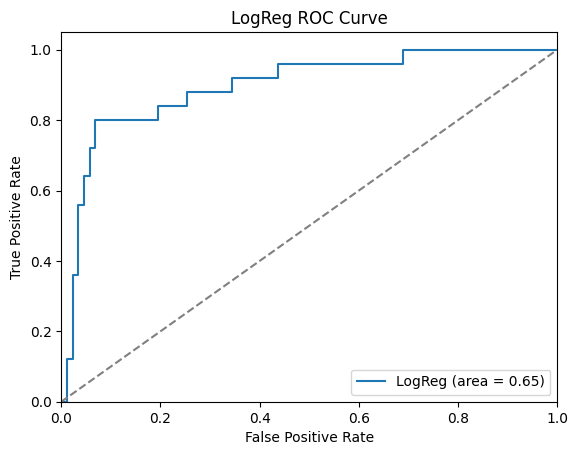

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label="LogReg (area = %0.2f)" % _roc_auc_score)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("LogReg ROC Curve")
plt.legend(loc="lower right")

Text(0.5, 1.0, 'LogReg CM')

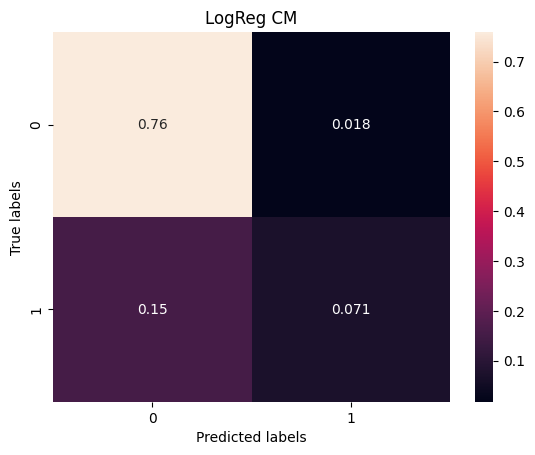

In [21]:
cm = eval(df_model_rpt["confusion_matrix"][0])

ax = plt.subplot()
plot = sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("LogReg CM")

In [22]:
cm

array([[0.75892857, 0.01785714],
       [0.15178571, 0.07142857]])